In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [2]:
df = pd.read_csv('airline_passengers.csv')
df

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [3]:
## Check fo Null vals

df.isna().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
## Drop that irrelevant record

df.dropna(inplace=True)

In [5]:
## Convert the Month feature to datetime feature

df.Month = pd.to_datetime(df.Month)
print(df.dtypes)
df.set_index("Month", inplace=True)

Month                      datetime64[ns]
Thousands of Passengers           float64
dtype: object


<AxesSubplot:xlabel='Month'>

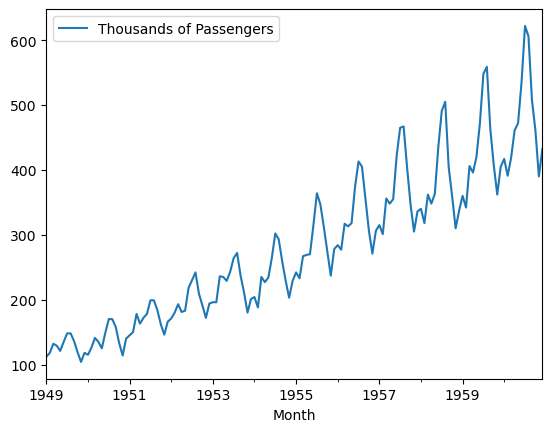

In [6]:
## Plot the distribution of timeseries

df.plot()

**=>** Seasonal trend.

### # Check for the Stationarity of data:

In [7]:
## Create a function to check the Stationarity of data

from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    adf_stat, p_val, _, _, _, _  = adfuller(series)
    print(f"ADF Stat: {adf_stat}\np-value: {p_val}")
    if p_val <= .05:
        print(
            "There's strong evidence against the null hypothesis, it's to be rejected. Data has no unit root and is stationary!")
    else:
        print("Time series has a unit root, null hypothesis is to be accepted. The data ain't stationary!")

In [8]:
# Check the Stationarity of Airlines data

adf_test(df.iloc[:, 0])

ADF Stat: 0.8153688792060463
p-value: 0.991880243437641
Time series has a unit root, null hypothesis is to be accepted. The data ain't stationary!


### Since the data ain't stationary, let's make it one by `differencing`.

In [9]:
## 1st differencing

df["first difference"] = df.iloc[:, 0] - df.iloc[:, 0].shift(1)
df

,Thousands of Passengers,first difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0
...,...,...
1960-08-01,606.0,-16.0
1960-09-01,508.0,-98.0
1960-10-01,461.0,-47.0


In [10]:
## Check the "first diffference" for Stationarity

adf_test(df.iloc[:, 1].dropna())

ADF Stat: -2.8292668241699857
p-value: 0.05421329028382734
Time series has a unit root, null hypothesis is to be accepted. The data ain't stationary!


### Differencing has to be done until and unless the data becomes stationary.

In [11]:
## 2nd difference

df["second difference"] = df.iloc[:, 1] - df.iloc[:, 1].shift(1)
df

,Thousands of Passengers,first difference,second difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0
...,...,...,...
1960-08-01,606.0,-16.0,-103.0
1960-09-01,508.0,-98.0,-82.0
1960-10-01,461.0,-47.0,51.0


In [12]:
## Check the "second difference" for Stationarity

adf_test(df.iloc[:, 2].dropna())

ADF Stat: -16.38423154246845
p-value: 2.732891850014516e-29
There's strong evidence against the null hypothesis, it's to be rejected. Data has no unit root and is stationary!


**=>** Finally the data became stationary.

### # Apply `seasonal differencing` too, since our data is seasonal..

In [13]:
## Seasonal differencing

df["Seasonal Difference"] = df.iloc[:, 0] - df.iloc[:, 0].shift(12)
df

,Thousands of Passengers,first difference,second difference,Seasonal Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [14]:
## Check the Stationarity for "Seasonal Difference"

adf_test(df.iloc[:, -1].dropna())

ADF Stat: -3.383020726492481
p-value: 0.011551493085514952
There's strong evidence against the null hypothesis, it's to be rejected. Data has no unit root and is stationary!


### # ACF plot:

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

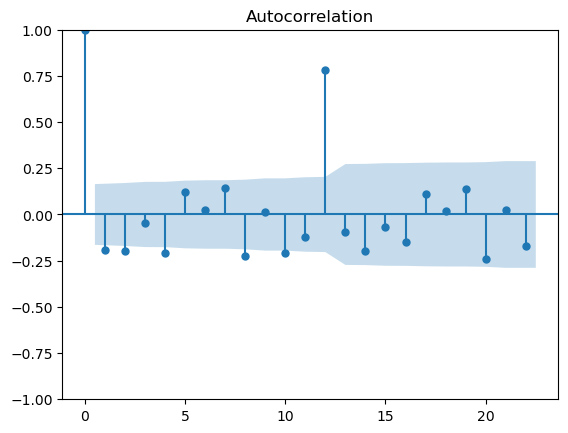

In [16]:
## Plot ACF for "second difference"

acf = plot_acf(df["second difference"].dropna())

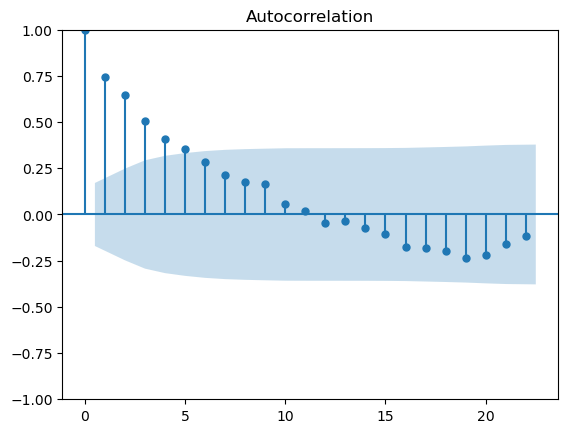

In [17]:
## ACF plot for "Seasonal Difference"

acf_seasonal = plot_acf(df["Seasonal Difference"].dropna())

**=>** q is 5 as can be inferenced form the ACF plot.

### # PACF plot:

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


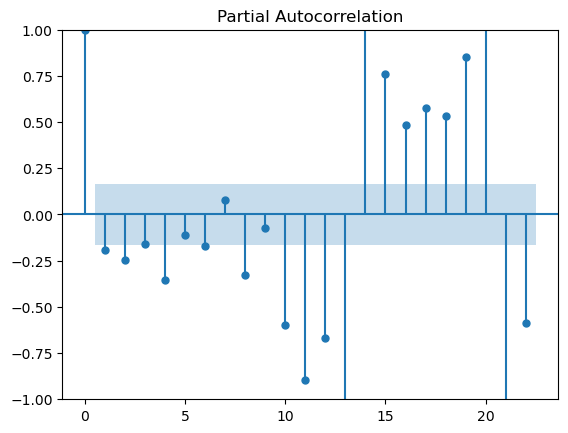

In [19]:
## Plot PACF for "second difference"

pacf = plot_pacf(df["second difference"].dropna())

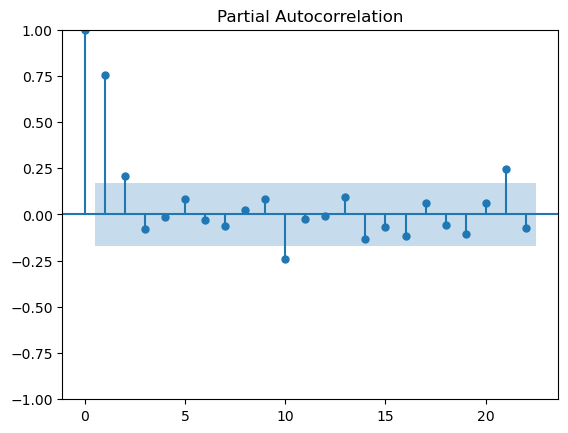

In [20]:
## Plot PACF for "Seasonal Difference"

pacf_seasonal = plot_pacf(df["Seasonal Difference"].dropna())

**=>** we could try p=2, 10, and 20 and so on...

In [21]:
## Spit the data into training and test sets

from datetime import datetime, timedelta

train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [22]:
train_data = df[:train_dataset_end]
test_data = df[train_dataset_end + timedelta(days=1):test_dataset_end]

In [23]:
train_data

,Thousands of Passengers,first difference,second difference,Seasonal Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [24]:
test_data

,Thousands of Passengers,first difference,second difference,Seasonal Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [25]:
## For predictions

pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

### build an ARIMA model..

In [26]:
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

mod = ARIMA(train_data['Thousands of Passengers'], order=(9,2,7))
mod.fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
fitted_mod = mod.fit()
fitted_mod.summary()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                      ARIMA(9, 2, 7)   Log Likelihood                -327.066
Date:                     Sun, 22 Jan 2023   AIC                            688.132
Time:                             02:06:53   BIC                            729.046
Sample:                         01-01-1949   HQIC                           704.558
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4696      0.248     -1.893      0.058      -0.956       0.017
ar.L2          0.1228      0.129      0.949      0.343      -0.131       0.376
ar.L3         -0.1879      0.115     -1.639      0.101      -0.413       0.037
ar.L4         -0.7551      0.117     -6.462      0.000      -0.984      -0.526
ar.L5         -0.5402      0.189     -2.861      0.004      -0.910      -0.170
ar.L6          0.0789      0.133      0.595      0.552      -0.181       0.339
ar.L7         -0.2334      0.101     -2.314      0.021      -0.431      -0.036
ar.L8         -0.7498      0.121     -6.220      0.000      -0.986      -0.514
ar.L9         -0.4612      0.218     -2.120      0.034      -0.888      -0.035
ma.L1         -0.7570      0.293     -2.581      0.010      -1.332      -0.182
ma.L2         -0.9629      0.325     -2.961      0.003      -1.600      -0.326
ma.L3          0.6192      0.313      1.981      0.048       0.006       1.232
ma.L4          1.0523      0.440      2.390      0.017       0.189       1.915
ma.L5         -0.3749      0.294     -1.274      0.203      -0.952       0.202
ma.L6         -1.0175      0.371     -2.740      0.006      -1.745      -0.290
ma.L7          0.5304      0.249      2.127      0.033       0.042       1.019
sigma2       133.0137     33.892      3.925      0.000      66.586     199.441
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.74
Prob(Q):                              0.97   Prob(JB):                         0.69
Heteroskedasticity (H):               2.29   Skew:                            -0.10
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
## Make predictions and fetch residuals

preds = fitted_mod.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data['Thousands of Passengers'] - preds

In [29]:
preds

1956-01-01    302.419039
1956-02-01    292.808125
1956-03-01    286.776614
1956-04-01    301.819023
1956-05-01    323.082539
1956-06-01    369.210934
1956-07-01    408.807950
1956-08-01    377.749935
1956-09-01    342.999618
1956-10-01    314.389614
1956-11-01    295.804040
1956-12-01    313.899925
1957-01-01    335.099233
1957-02-01    329.254036
1957-03-01    328.340347
1957-04-01    345.425939
1957-05-01    372.300654
1957-06-01    412.260983
1957-07-01    436.115509
1957-08-01    416.059752
1957-09-01    382.530799
1957-10-01    356.911071
1957-11-01    344.615220
1957-12-01    354.401988
1958-01-01    367.895649
1958-02-01    367.128999
1958-03-01    370.257008
1958-04-01    389.355351
1958-05-01    418.942313
1958-06-01    452.514839
1958-07-01    468.764828
1958-08-01    452.811685
1958-09-01    423.230772
1958-10-01    400.009862
1958-11-01    389.865964
1958-12-01    394.694222
1959-01-01    403.061325
1959-02-01    405.382204
1959-03-01    412.443557
1959-04-01    433.318104


<AxesSubplot:ylabel='Density'>

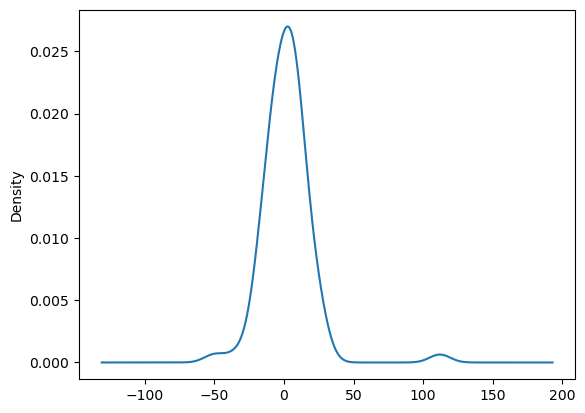

In [30]:
## Plot residuals distribution

fitted_mod.resid.plot(kind='kde')

C:\Users\Admin\AppData\Local\Temp\ipykernel_6684\901596900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["arima_preds"] = preds


<AxesSubplot:xlabel='Month'>

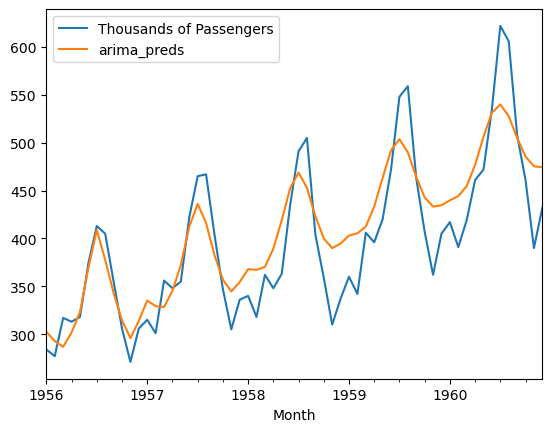

In [31]:
## Append the predictions column into the test data itself
test_data["arima_preds"] = preds

# Plot predictions against the test data
test_data[['Thousands of Passengers','arima_preds']].plot()

**=>** Interesting, good enough (even we are using ARIMA for seasonal data)!

### build a SARIMA model..

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

mod_SARIMA = SARIMAX(train_data['Thousands of Passengers'], order=(9,2,7), seasonal_order=(6,1,3,12))

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [33]:
## Summary

fitted_sarima = mod_SARIMA.fit()
fitted_sarima.summary()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed t

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                    Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(9, 2, 7)x(6, 1, [1, 2, 3], 12)   Log Likelihood                -252.032
Date:                                    Sun, 22 Jan 2023   AIC                            556.064
Time:                                            02:07:35   BIC                            614.525
Sample:                                        01-01-1949   HQIC                           579.285
                                             - 12-01-1955                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1128      2.675     -0.416      0.677      -6.357       4.131
ar.L2         -0.9040      4.068     -0.222      0.824      -8.878       7.070
ar.L3         -0.5944      5.291     -0.112      0.911     -10.965       9.776
ar.L4          0.0056      5.398      0.001      0.999     -10.574      10.585
ar.L5          0.3143      4.807      0.065      0.948      -9.108       9.737
ar.L6          0.7267      4.085      0.178      0.859      -7.280       8.734
ar.L7          0.0459      1.334      0.034      0.973      -2.569       2.661
ar.L8         -0.1380      0.898     -0.154      0.878      -1.897       1.621
ar.L9          0.0727      0.641      0.113      0.910      -1.183       1.328
ma.L1         -0.0819    273.756     -0.000      1.000    -536.634     536.470
ma.L2         -0.1191    287.244     -0.000      1.000    -563.107     562.869
ma.L3         -0.4446    251.711     -0.002      0.999    -493.789     492.900
ma.L4         -0.5409    332.124     -0.002      0.999    -651.493     650.411
ma.L5         -0.3111    198.267     -0.002      0.999    -388.907     388.285
ma.L6         -0.3399    280.147     -0.001      0.999    -549.418     548.738
ma.L7          0.8375    239.395      0.003      0.997    -468.367     470.042
ar.S.L12       0.0938   1007.491   9.31e-05      1.000   -1974.553    1974.740
ar.S.L24      -0.0073    256.087  -2.84e-05      1.000    -501.928     501.913
ar.S.L36       0.2208    193.844      0.001      0.999    -379.706     380.148
ar.S.L48       0.0295    164.402      0.000      1.000    -322.192     322.251
ar.S.L60       0.7145     88.350      0.008      0.994    -172.448     173.878
ar.S.L72      -0.2780    770.610     -0.000      1.000   -1510.646    1510.090
ma.S.L12      -0.0240   1067.835  -2.25e-05      1.000   -2092.941    2092.893
ma.S.L24      -0.1722    406.397     -0.000      1.000    -796.696     796.351
ma.S.L36       0.0022    376.730   5.83e-06      1.000    -738.375     738.380
sigma2        28.1498   9204.037      0.003      0.998    -1.8e+04    1.81e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 3.40
Prob(Q):                              0.69   Prob(JB):                         0.18
Heteroskedasticity (H):               2.49   Skew:                             0.47
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
## Make Predictions and fetch residuals

preds_sarima = fitted_sarima.predict(start=datetime(1956,6,6), end=datetime(1960,12,1))
sarima_residuals = test_data['Thousands of Passengers'] - preds_sarima

In [35]:
preds_sarima

1956-07-01    412.147358
1956-08-01    395.499515
1956-09-01    361.235198
1956-10-01    323.324509
1956-11-01    284.545077
1956-12-01    322.927233
1957-01-01    333.250784
1957-02-01    317.057709
1957-03-01    361.696569
1957-04-01    358.881143
1957-05-01    362.314729
1957-06-01    423.578749
1957-07-01    458.913219
1957-08-01    450.742967
1957-09-01    406.068298
1957-10-01    366.911180
1957-11-01    329.228200
1957-12-01    372.118676
1958-01-01    377.343796
1958-02-01    359.025023
1958-03-01    423.780464
1958-04-01    426.705243
1958-05-01    428.095423
1958-06-01    472.217851
1958-07-01    516.092678
1958-08-01    505.132618
1958-09-01    460.406641
1958-10-01    410.310912
1958-11-01    366.855579
1958-12-01    410.591176
1959-01-01    416.695408
1959-02-01    391.570453
1959-03-01    455.421502
1959-04-01    451.022767
1959-05-01    469.235074
1959-06-01    522.487080
1959-07-01    576.121120
1959-08-01    557.027688
1959-09-01    510.127279
1959-10-01    460.157183


<AxesSubplot:ylabel='Density'>

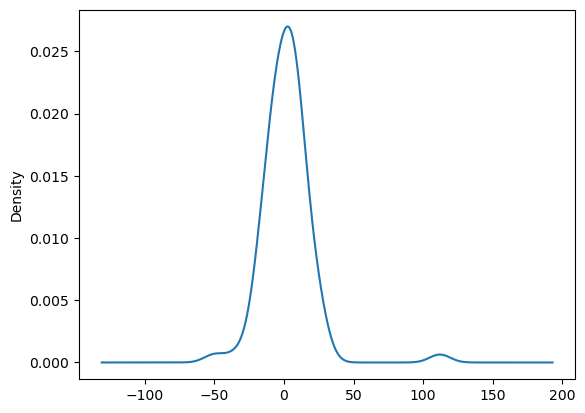

In [36]:
## Plot residuals distribution

fitted_mod.resid.plot(kind='kde')

<AxesSubplot:xlabel='Month'>

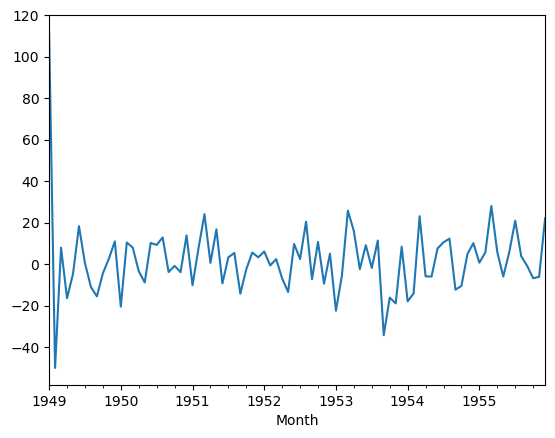

In [37]:
fitted_mod.resid.plot()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6684\924944149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["sarima_preds"] = preds_sarima


<AxesSubplot:xlabel='Month'>

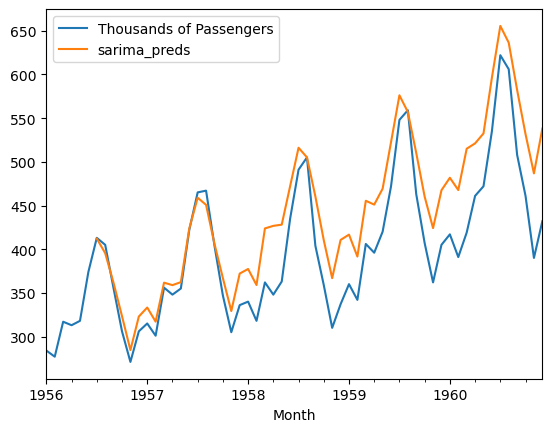

In [38]:
## Append the predictions column into the test data itself
test_data["sarima_preds"] = preds_sarima

# Plot predictions against the test data
test_data[['Thousands of Passengers','sarima_preds']].plot()

**=>** Way better than before!

<AxesSubplot:xlabel='Month'>

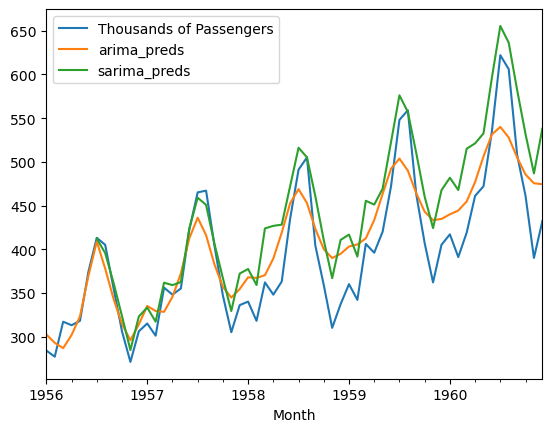

In [39]:
test_data[['Thousands of Passengers','arima_preds','sarima_preds']].plot()